In [175]:
%matplotlib inline
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

def readDataasDF(file_path):
    df = pd.read_csv(file_path, header=None)
    df.rename(columns={0: 'label'}, inplace=True)
    return df

class Bound:
    def __init__(self, df):
        self.tmax = df.columns.values[df.columns!='label'].max()
        self.tmin = df.columns.values[df.columns!='label'].min()
        self.xmax = df.max().max()
        self.xmin = df.min().min()

    def setRowsAndCols(self, rows, cols):
        self.rows = rows
        self.cols = cols
        
class NN:
    def __init__(self):
        self.TS = -1
        self.Jac = -1
        self.label = ''

sigma = 0.18
epsilon = 21

D = readDataasDF('CinC_ECG_torso\\CinC_ECG_torso_TRAIN')
Q = readDataasDF('CinC_ECG_torso\\CinC_ECG_torso_TEST')

print(D.label.unique())

[1 3 4 2]


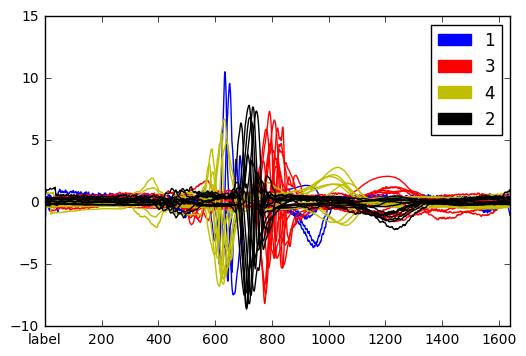

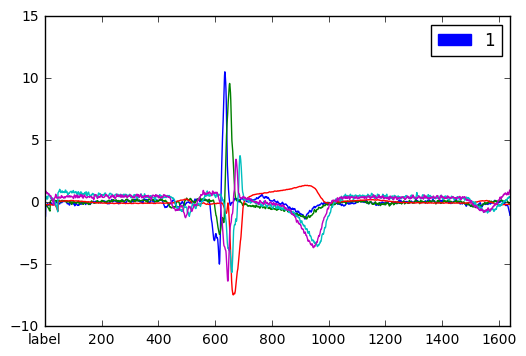

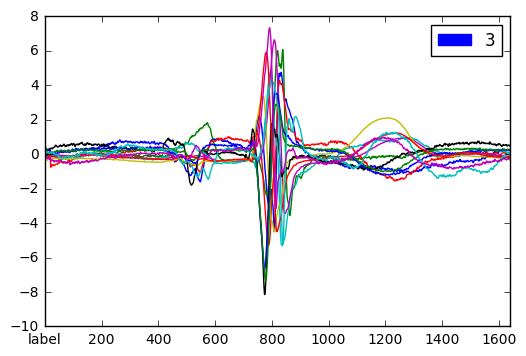

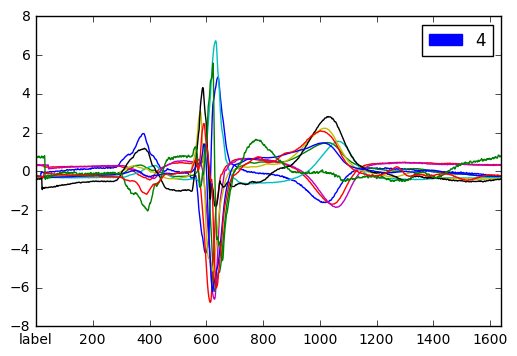

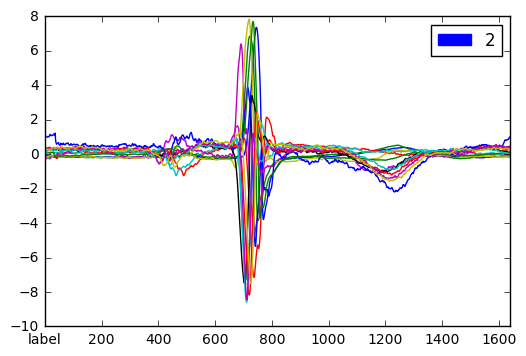

In [177]:
import matplotlib.pyplot as plt

patch = list()
fig, ax = plt.subplots()
styles = ['b','r','y','k']
for i, style in zip(D.label.unique(), styles):
    D[D.label==i].transpose().plot(legend=False, style=style, ax=ax)
    patch += list([mpatches.Patch(color=style, label=i)])

plt.legend(handles=patch)
fig.savefig('all_ECG.png')

for i in D.label.unique():
    plt = D[D.label==i].transpose().plot(legend=False)
    plt.legend(handles=[mpatches.Patch(color='blue', label=i)])
    f_name = 'fig_' + i.astype(str) + '.png'
    plt.get_figure().savefig(f_name)

In [179]:
D = readDataasDF('CBF\\CBF_TRAIN')
Q = readDataasDF('CBF\\CBF_TEST')

print(D.label.unique())

[1 3 2]


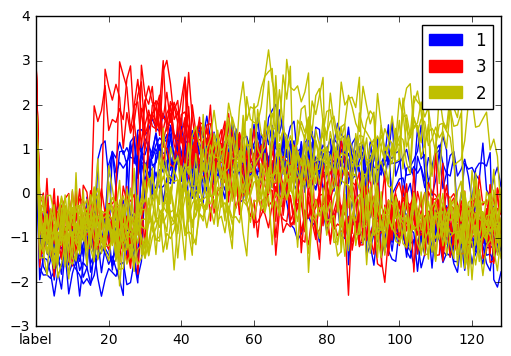

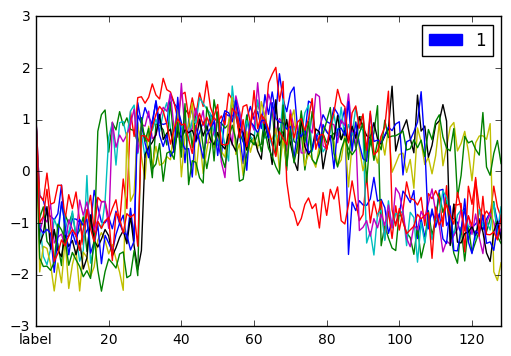

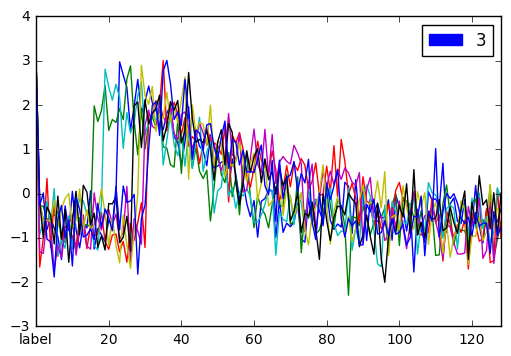

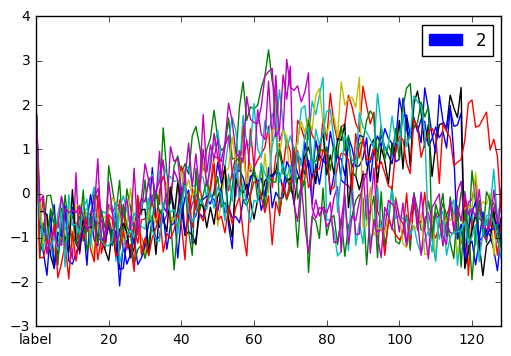

In [173]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
patch = list()
styles = ['b','r','y']
for i, style in zip(D.label.unique(), styles):
    D[D.label==i].transpose().plot(legend=False, style=style, ax=ax)
    patch += list([mpatches.Patch(color=style, label=i)])

plt.legend(handles=patch)

plt.show()
fig.savefig('all_CBF.png')

for i in D.label.unique():
    plt = D[D.label==i].transpose().plot(legend=False)
    plt.legend(handles=[mpatches.Patch(color='blue', label=i)])
    f_name = 'fig_' + i.astype(str) + 'CBF.png'
    plt.get_figure().savefig(f_name)

In [171]:
list([1,2,3])+list([4])

[1, 2, 3, 4]

### classify label using avgTS

In [179]:
D = readDataasDF('CBF\\CBF_TRAIN')
Q = readDataasDF('CBF\\CBF_TEST')

print(D.label.unique())

[1 3 2]


In [180]:
avgSet = pd.DataFrame(D[D.label == i].sum() for i in D.label.unique())
avgSet.label  = 1,2,3

avgSet.to_csv('avgSet.csv')

In [121]:
type(D[D.label==1].sum())

pandas.core.series.Series

In [189]:
import heapq as hp
heap = [(0.3, 1)]
hp.heappush(heap, (0.5,2))
a = hp.heappop(heap)

In [192]:
ordered = []
while heap:
    ordered.append(hp.heappop(heap))

In [194]:
hp.heappush(heap, (1,2))

In [201]:
print(ordered)

[(0.5, 2)]


In [198]:
heap=[]
data =[(1,4),(2,5),(4,6)]
for i in data:
    hp.heappush(heap, i)
    
print(heap)

[(1, 4), (2, 5), (4, 6)]


In [199]:
hp.heappush(heap, (3,7))

In [202]:
print(heap)

[(1, 4), (2, 5), (4, 6), (3, 7)]


In [203]:
heap = []

In [206]:
hp.heappush(heap, (1,4))

In [207]:
print(heap)

[(1, 4), (1, 4)]


In [208]:
hp.heappush(heap, (0,2))

In [209]:
print(heap)

[(0, 2), (1, 4), (1, 4)]


In [210]:
hp.heappushpop(heap, (4,1))

(0, 2)

In [211]:
print(heap)

[(1, 4), (1, 4), (4, 1)]


In [218]:
heap=[]

In [219]:
print(heap)

[]


In [220]:
hp.heappush(heap, (3,5))

In [221]:
print(heap)

[(3, 5)]


In [222]:
hp.heappushpop(heap, (2,1))

(2, 1)

In [223]:
print(heap)

[(3, 5)]


In [224]:
hp.heappushpop(heap, (5,2))

(3, 5)

In [225]:
print(heap)

[(5, 2)]


In [227]:
heap[0][1]

2